In [2]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from ParseandPlotNoReward_withGoodBehavior import GetData as gd
task_dict = {'Task1':'1 Fam Rew', 'Task2':'2 No Rew', 'Task3':'3 Fam Rew', 'Task4':'4 Nov Rew'}

In [4]:
FolderName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/NR6/'
task_numframes = [20000, 20000, 15000, 15000]

In [5]:
A = gd(FolderName=FolderName, Task_NumFrames=task_numframes, TaskDict=task_dict)

Number of laps in Task4 is 33
Number of laps in Task1 is 43
Number of laps in Task3 is 25
Number of laps in Task2 is 31
Space with high licks 0.59
Pre lick stops at 9th lap
Number of PlaceCells in Task4 is 84
Number of PlaceCells in Task1 is 90
Number of PlaceCells in Task3 is 75
Number of PlaceCells in Task2 is 97


In [6]:
data = scipy.io.loadmat(os.path.join(A.FolderName, A.ImgFileName[0]))
img_masks = data['data'].item()[3]
mean_image = data['data'].item()[5]

In [47]:
task_mask = np.zeros_like(img_masks[:, :, 0])
cell_mask = {keys: [] for keys in A.TaskDict}
place_cell_mask = {keys: [] for keys in A.TaskDict}

for keys, pfs in A.sig_PFs_cellnum_dict.items():
    task_mask = np.zeros_like(img_masks[:, :, 0])
    pf_mask = np.zeros_like(img_masks[:, :, 0])
    for p in pfs:
        task_mask += img_masks[:, :, p]
        if p in [30, 40, 125, 164, 160, 8]:
            pf_mask += img_masks[:, :, p]
    
    mask = np.ma.masked_where(task_mask > 0, task_mask)
    cell_mask[keys].extend(mask.filled())
    mask = np.ma.masked_where(pf_mask > 0, pf_mask)
    place_cell_mask[keys].extend(mask.filled())

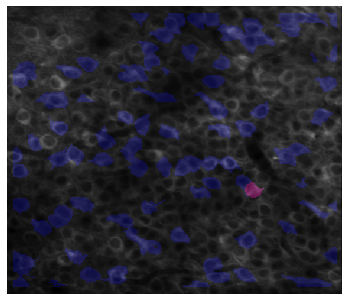

In [46]:
import matplotlib as mpl 
fs = plt.figure(figsize=(6, 6), frameon=False)
ax = fs.add_subplot(111)
ax.imshow(mean_image, cmap='gray', interpolation=None)
cm1 = mpl.colors.ListedColormap(['black','blue'])
ax.imshow(cell_mask['Task1'], cmap=cm1, interpolation=None, alpha=0.3)
cm1 = mpl.colors.ListedColormap(['black','red'])
ax.imshow(place_cell_mask['Task1'], cmap=cm1, interpolation=None, alpha=0.3)
ax.axis('off')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
fs.savefig('Mean_Image.jpg',dpi=400, bbox_inches='tight', pad_inches=0)

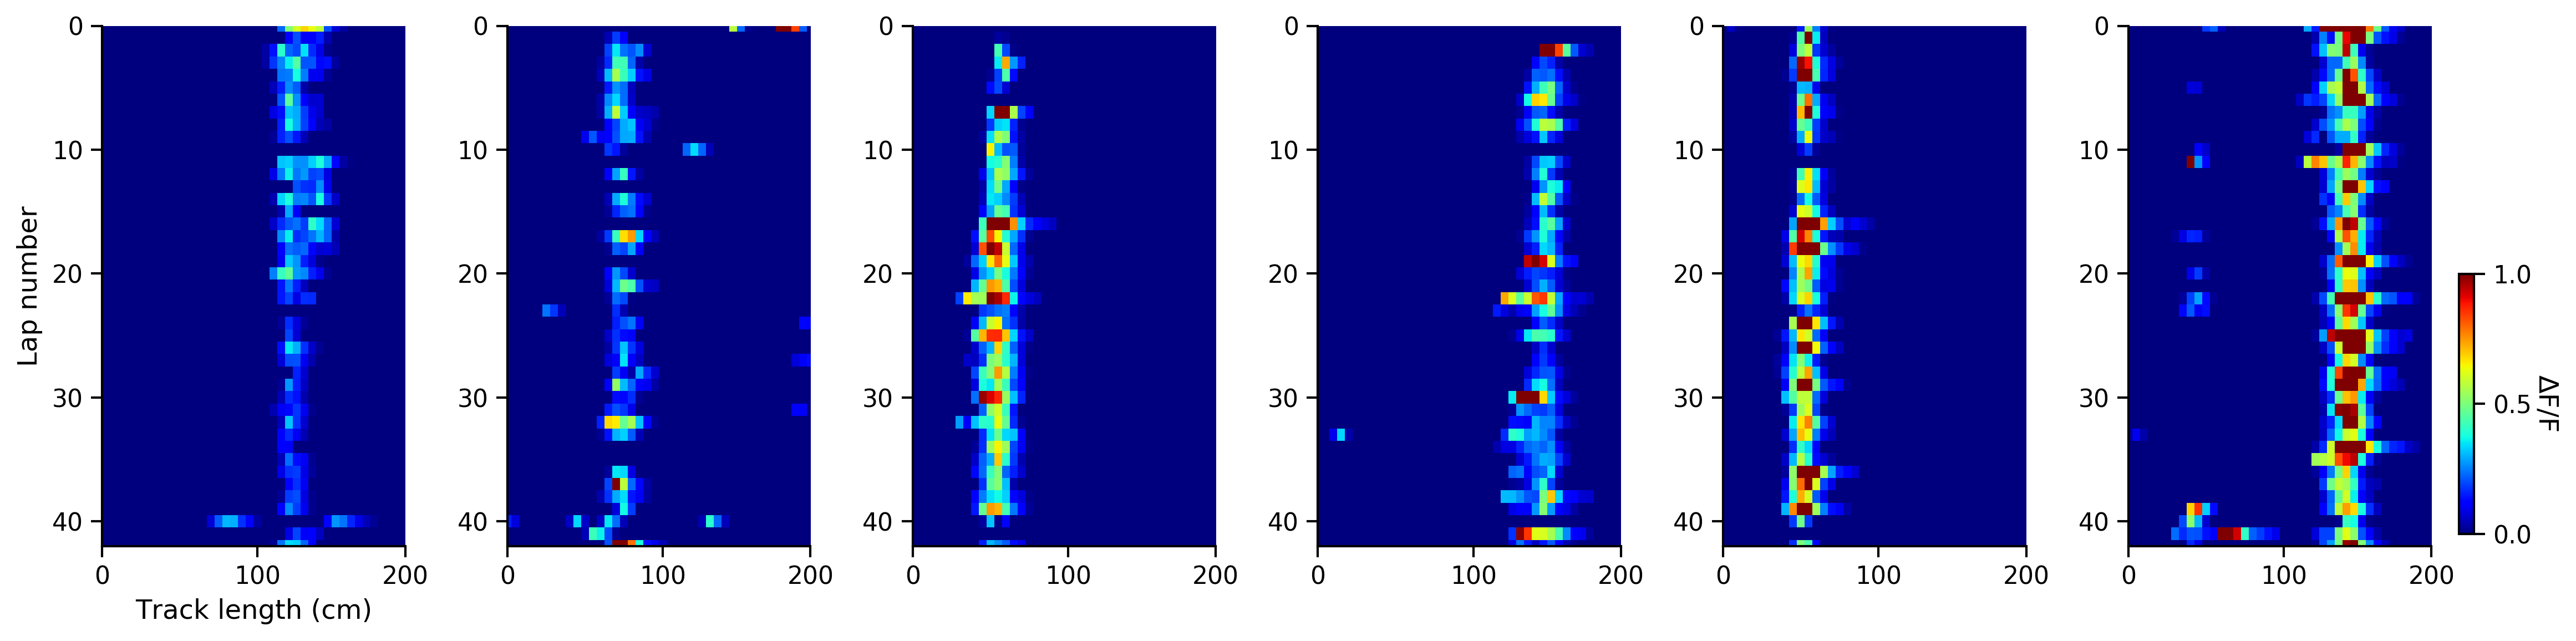

In [33]:
#Plot some example PFs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
x = scipy.io.loadmat(os.path.join(A.FolderName, 'Behavior', A.PlaceFieldData[1]))
pfs = [30, 40, 125, 160, 164, 8]
fs, axes = plt.subplots(1, len(pfs), figsize=(15, 4), sharex='all', dpi=300)
n = 0
for p in A.sig_PFs_cellnum_dict['Task1']:
    if p in pfs:
        img = axes[n].imshow(np.nan_to_num(x['Allbinned_F'][0, p]).T, interpolation='nearest',
                                   aspect='auto', cmap='jet', vmin=0, vmax=1)
        axes[n].locator_params(axis='y', tight=True, nbins=5)
        axes[n].spines['right'].set_visible(False)
        axes[n].spines['top'].set_visible(False)
        axes[n].locator_params(axis='x', tight=True)
        axes[n].set_xticks([0, 20, 39])
        axes[n].set_xticklabels([0, 100, 200])
        axes[n].set_xlim((0, 39))
        axes[n].set_ylim((A.numlaps['Task1']-1, 0))
        axes[n].spines['bottom'].set_smart_bounds(True)
        n+=1
axes[0].set_ylabel('Lap number')
axes[0].set_xlabel('Track length (cm)')

axins = inset_axes(axes[-1],
                   width="5%",  # width = 5% of parent_bbox width
                   height="50%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes[-1].transAxes,
                   borderpad=0.5,
                   )
cb = fs.colorbar(img, cax = axins, pad=0.2,ticks=[0, 0.5, 1])
cb.set_label('\u0394F/F', rotation=270, labelpad=12)
plt.tight_layout()
plt.savefig('ExamplePlaceCells.eps', dpi=400, bbox_inches='tight')

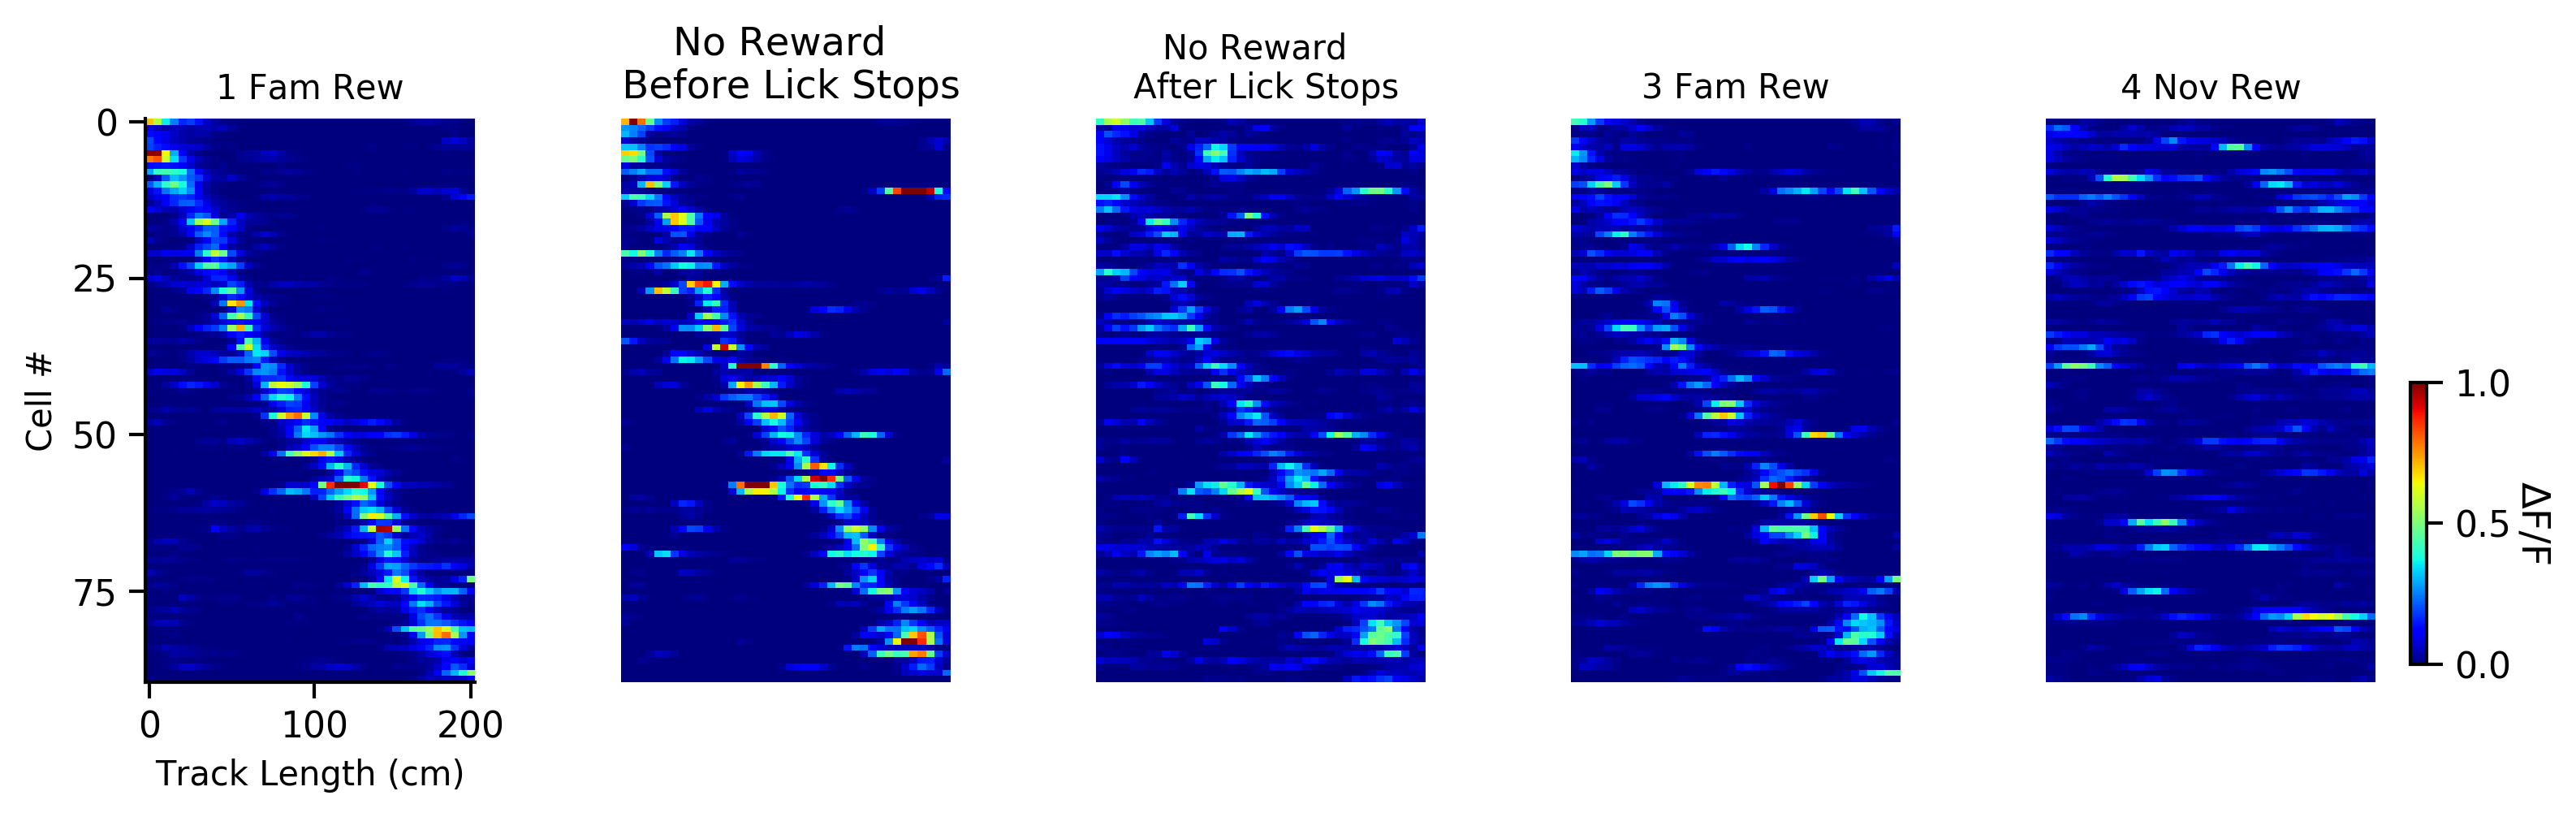

In [34]:
c = A.plot_remapping_withTaskA_splitbylickstop(TaskA='Task1')
plt.savefig('Remapping.eps', dpi=400, bbox_inches='tight')